#### 1. Configurações gerais

##### 1.1 Instalando bibliotecas

In [1]:
#!pip install statsmodels

##### 1.2 Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

In [3]:
import  warnings 
warnings.simplefilter('ignore')

In [4]:
# Configurando tamanho das imagens
rcParams['figure.figsize'] = 15, 6

#### 2. Leitura de dados
Serão apresentados dois métodos para importação de dados utilizando as libs statsmodels e pandas.

##### 2.1. Método de Importação 1 (via statsmodels)

In [5]:
co2_df = sm.datasets.co2.load_pandas().data
co2_df.head(5)
#type(co2_data)

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [6]:
print(sm.datasets.co2.DESCRLONG)


Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.

Period of Record: March 1958 - December 2001

Methods: An Applied Physics Corporation (APC) nondispersive infrared gas analyzer was used to obtain atmospheric CO2 concentrations, based on continuous data (four measurements per hour) from atop intake lines on several towers. Steady data periods of not less than six hours per day are required; if no such six-hour periods are available on any given day, then no data are used that day. Weekly averages were calculated for most weeks throughout the approximately 44 years of record. The continuous data for year 2000 is compared with flask data from the same site in the graphics section.


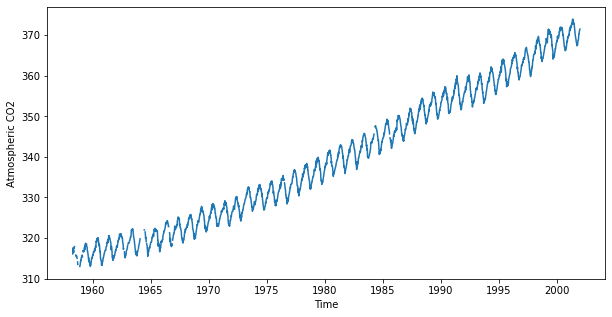

In [7]:
plt.figure(figsize=(10,5))
plt.xlabel("Time")
plt.ylabel("Atmospheric CO2")
plt.plot(co2_df)

##### 2.2 Método de Importação 2 (via pandas)

In [8]:
airPassenger_df = pd.read_csv("Data/AirPassengers_2.csv", sep=",")
#airPassenger_df = airPassenger_df.set_index('Month')
airPassenger_df.head(2)

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0


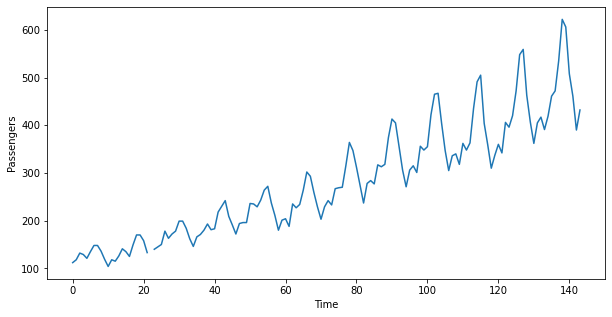

In [9]:
plt.figure(figsize=(10,5))
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.plot(airPassenger_df['Passengers'])

#### 3. Análise de Séries Temporais

##### 3.1 Série tempioral: AirPassenger

In [10]:
# Existem "valores faltantes"?
airPassenger_df.isnull().values.any()

True

##### 3.1.1 Imputação

In [11]:
# Exemplo básico
df = pd.DataFrame([[2, 0], [4, np.nan], [np.nan, 5], [3, 4]], columns=list("BD"))
df

,B,D
0,2.0,0.0
1,4.0,NaN
2,NaN,5.0
3,3.0,4.0


In [12]:
# Imputação via ffill
df.fillna(method='ffill')

,B,D
0,2.0,0.0
1,4.0,0.0
2,4.0,5.0
3,3.0,4.0


In [13]:
# Imputação via bfill
df.fillna(method='bfill')

,B,D
0,2.0,0.0
1,4.0,5.0
2,3.0,5.0
3,3.0,4.0


Valores faltantes: False!


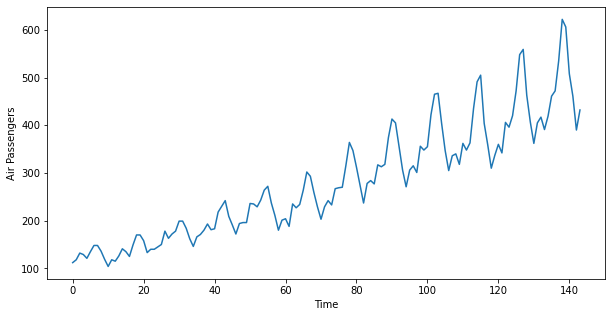

In [14]:
# Imputação
airPassenger_df = airPassenger_df.fillna(method='bfill')

plt.figure(figsize=(10, 5))
plt.xlabel("Time")
plt.ylabel("Air Passengers")
plt.plot(airPassenger_df['Passengers'])

print(f'Valores faltantes: {airPassenger_df.isnull().values.any()}!')

**Dúvida**: Qual o melhor método de imputação para séries temporais?

**Artigo 01**: Cunha Júnior, R. O. da, & Firmino, P. R. A. (2022). Simulação de valores ausentes em séries temporais de precipitação para avaliação de métodos de imputação. Revista Brasileira De Climatologia, 30(18), 691–714. https://doi.org/10.55761/abclima.v30i18.15243

**Artigo 02**: Junger, W. L., & De Leon, A. P. (2015). Imputation of missing data in time series for air pollutants. Atmospheric Environment, 102, 96-104. https://www.sciencedirect.com/science/article/abs/pii/S1352231014009145



In [15]:
df = pd.read_csv("Data/MVF.csv", sep=";")
df = df.set_index('time')
df.head(2)

,target
time,
1,150
2,117


<AxesSubplot:xlabel='time'>

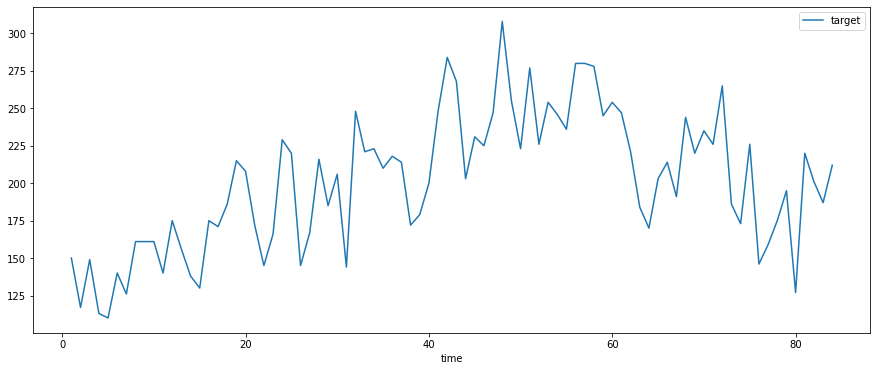

In [16]:
df.plot()

##### 3.1.2 Descomposição 

In [17]:
df_decomp = tsa.seasonal_decompose(df, period=12)

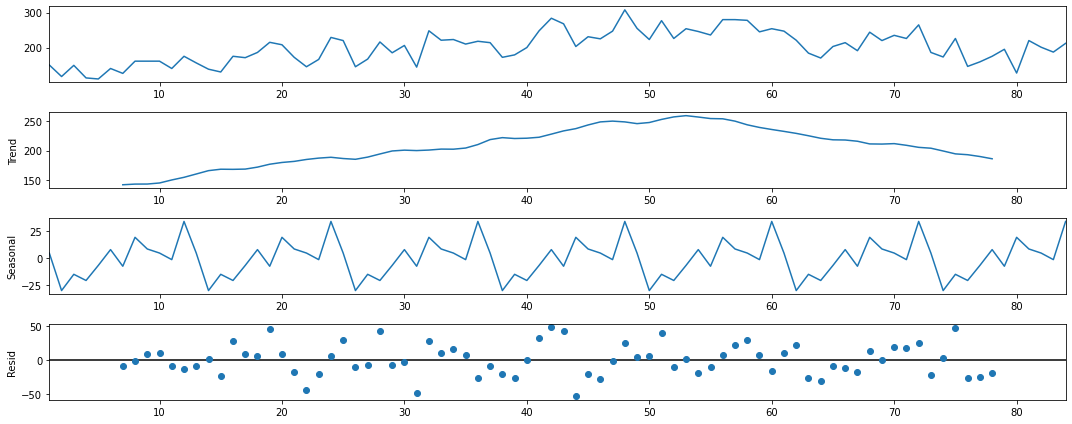

In [18]:
df_decomp.plot();

**Algumas definições**:

* ***Tendência***: mudança sistemática na série temporal definida como um padrão de crescimento/descrescimento da variável em um certo período de tempo;

* ***Sazonalidade***: comportamento que se repete durante um período de tempo;

* ***Série temporal estacionária***: possui média e variância constantes (simplificação). 



<AxesSubplot:xlabel='time'>

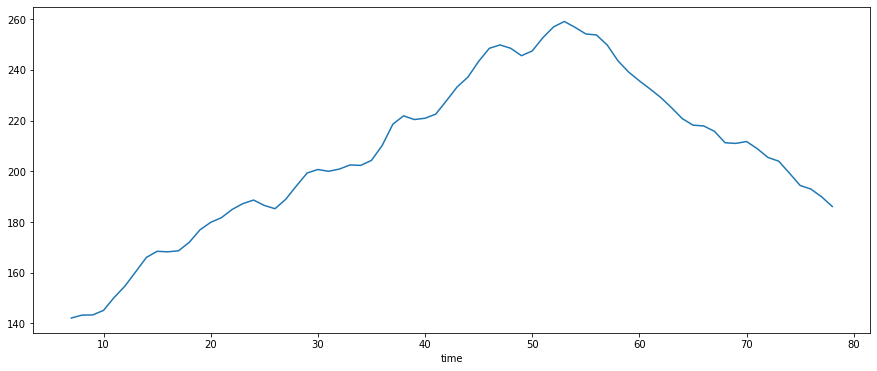

In [19]:
df_decomp.trend.plot()

##### 3.1.3 Média deslizante e desvio padrão (k=12) 

In [20]:
# A 13a observação será a média das 11 anteriores
rolmean12 = df.rolling(window = 12).mean()
print(rolmean12.head(15))

          target
time            
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12    141.916667
13    142.416667
14    144.166667
15    142.583333


In [21]:
rolstd12 = df.rolling(window = 12).std()
print(rolstd12.head(15))

         target
time           
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12    21.402881
13    21.677212
14    20.238727
15    20.566780


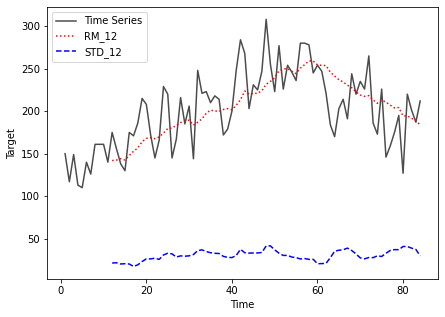

In [22]:
plt.figure(figsize=(7, 5))
actual = plt.plot(df['target'], color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

##### Teste estatítico: Augmented Dickey-Fuller

$H_0$: a série possui uma raiz unitária (série não estacionária);

$H_1$: a série não possui raiz unitária (série estacionária).

Vamos supor $alpha=0.05$.


In [23]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df['target'])
print(f'p-valor: {round(adf[1],2)}')

p-valor: 0.13


##### 3.1.4 Autocorrelação e Autocorrelação Parcial
* Utilizada para analisar o grau de dependência temporal na série;
* Auxilia na seleção de possíveis modelos de séries temporais estacionárias;
* Um ***correlograma*** é a forma gráfica de se analisar a autocorrelação;
* O correlograma traça as autocorrelações em diversas defasagens;
* Frequentemente utilizado para analisar os resíduos de um modelo;
* **Importante**: Em uma série completamente aleatória os lags são não correlacionados, ou seja, espera-se que o coeficiente de autocorrelação amostral seja próximo à zero.


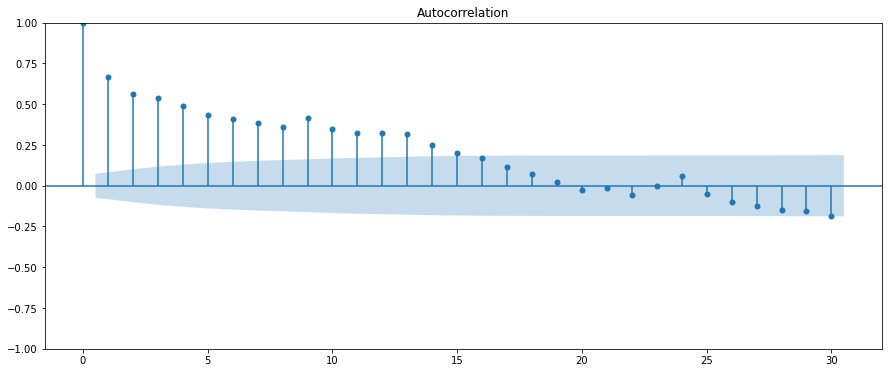

In [24]:
plot_acf(df, lags=30, alpha=0.5);

* Para séries não estacionárias, os valores do coeficiente não decaem para zero a não ser em defasagens grandes.

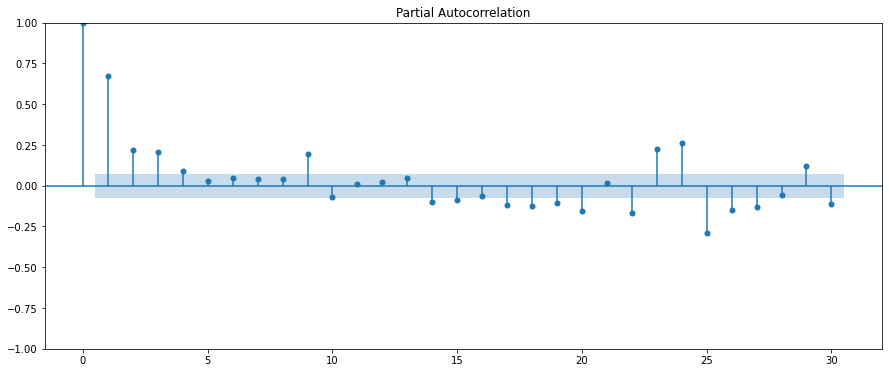

In [25]:
plot_pacf(df, lags=30, alpha=0.5);

<AxesSubplot:xlabel='time'>

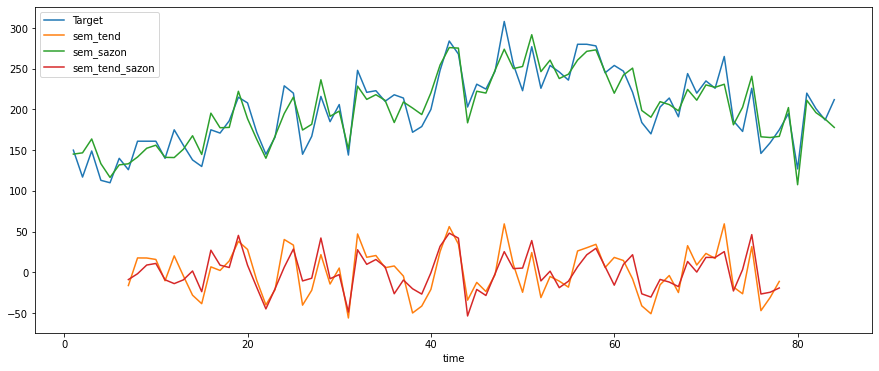

In [26]:
new_df = pd.DataFrame()
new_df['Target'] = df_decomp.observed
new_df['sem_tend'] = df_decomp.observed - df_decomp.trend
new_df['sem_sazon'] = df_decomp.observed - df_decomp.seasonal
new_df['sem_tend_sazon'] = df_decomp.observed - df_decomp.trend - df_decomp.seasonal
new_df.plot()

##### 3.1.5 Eliminação da Tendência por Diferenciação

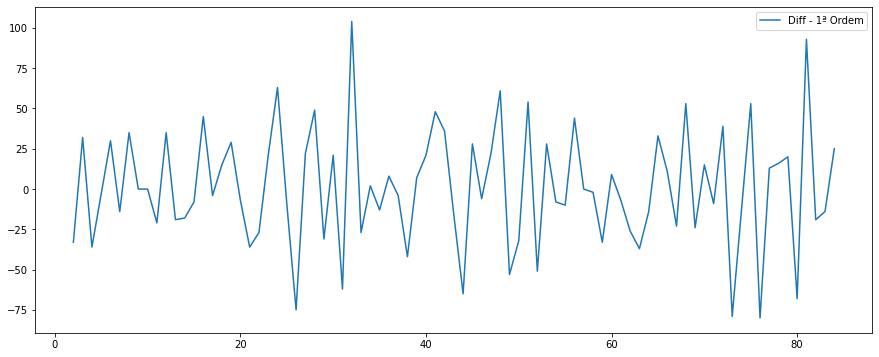

In [27]:
df_1ordem = df.diff()
plt.plot(df_1ordem, label="Diff - 1ª Ordem")
plt.legend(loc='best')
plt.show()

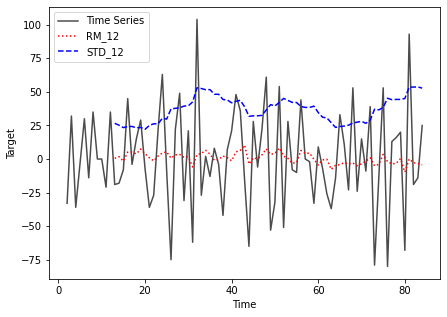

In [28]:
# A 13a observação será a média das 11 anteriores
rolmean12 = df.diff().rolling(window = 12).mean()
rolstd12 = df.diff().rolling(window = 12).std()
plt.figure(figsize=(7, 5))
actual = plt.plot(df['target'].diff(), color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

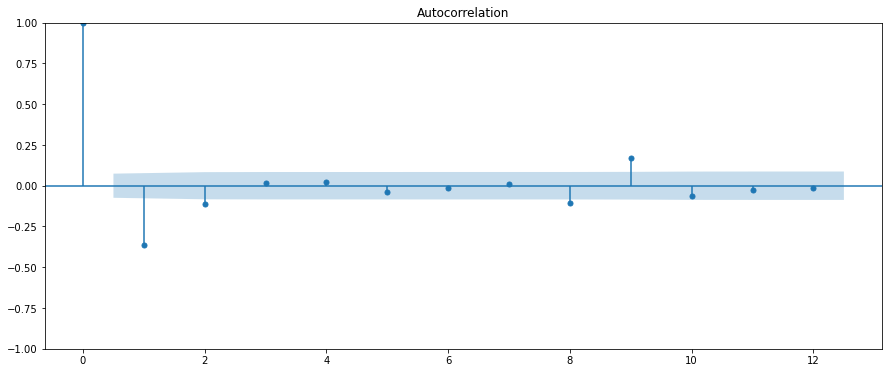

In [29]:
plot_acf(df_1ordem.dropna(), lags=12, alpha=0.5);

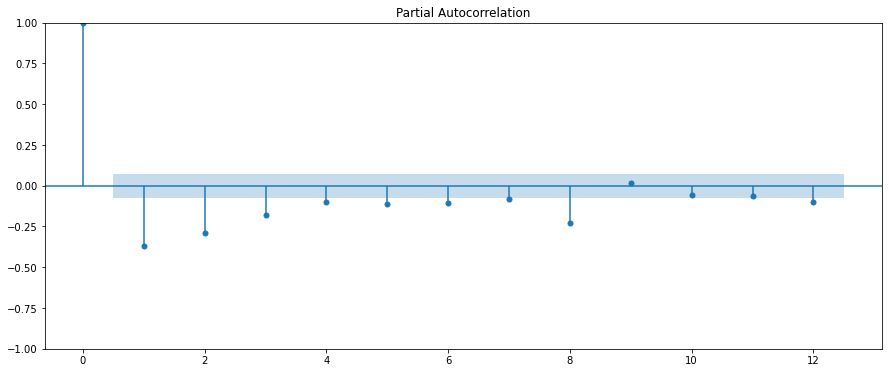

In [30]:
plot_pacf(df_1ordem.dropna(), lags=12, alpha=0.5);

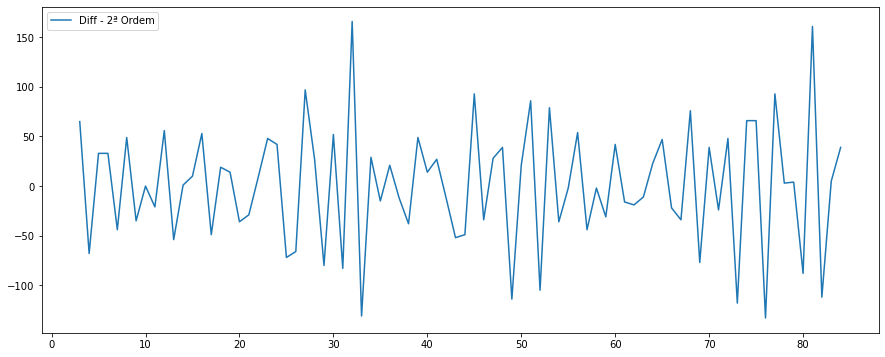

In [31]:
df_2ordem = df_1ordem.diff()
plt.plot(df_2ordem, label="Diff - 2ª Ordem")
plt.legend(loc='best')
plt.show()

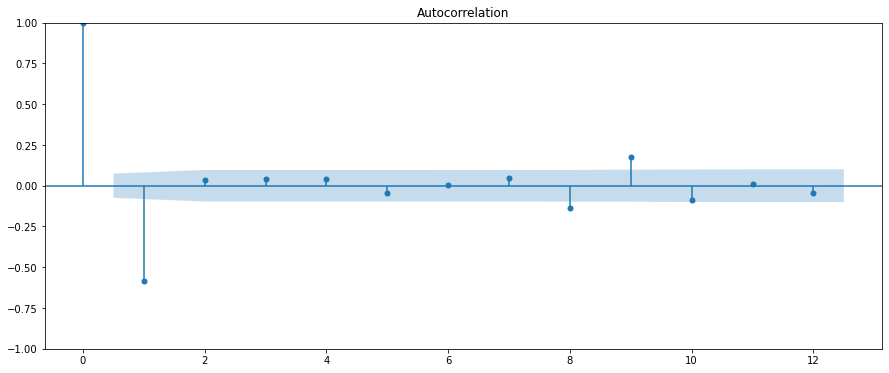

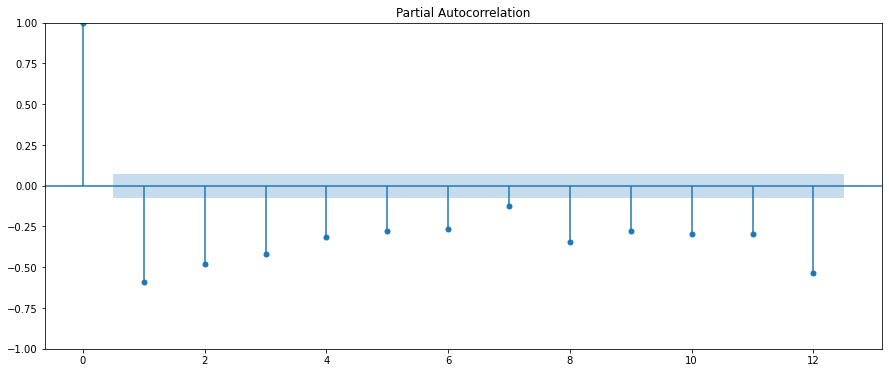

In [32]:
plot_acf(df_2ordem.dropna(), lags=12, alpha=0.5);
plot_pacf(df_2ordem.dropna(), lags=12, alpha=0.5);

* É possível observar que ainda existem lags que estão com correlação estatisticamente significante, ou seja, o residuo ainda não pode ser considerado I.I.D. Por conta disso, os modelos de tendência e sazonalidade precisam ser reajustados.


### **Exercício 01**

Considerando as séries temporais co2, copper (*world consumption*) e cancer (disponíveis no statesmodel), avalie:

**a)** A série é estacionária? Possui tendência? Possui sazonalidade?

**b)** Após a realização de uma diferenciação, a série se torna estacionária?


#### CO2

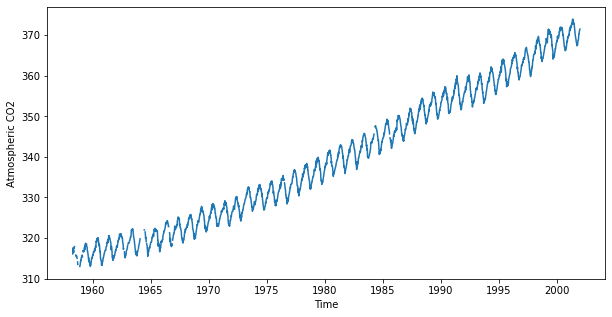

In [33]:
plt.figure(figsize=(10,5))
plt.xlabel("Time")
plt.ylabel("Atmospheric CO2")
plt.plot(co2_df)

In [37]:
co2_df = co2_df.fillna(method='ffill')

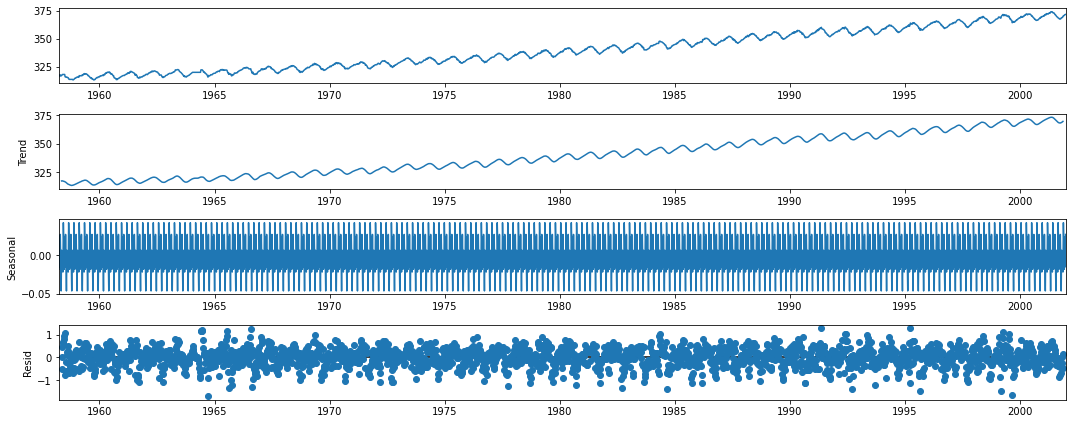

In [38]:
co2_df_decomp = tsa.seasonal_decompose(co2_df, period=12)
co2_df_decomp.plot();

In [45]:
adf = adfuller(co2_df['co2'])
print(f'p-valor: {round(adf[1],2)}')

p-valor: 0.96


a) A serie CO2 não é uma série estacionária. Ela possui tendencia positiva e não possui sazonalidade.

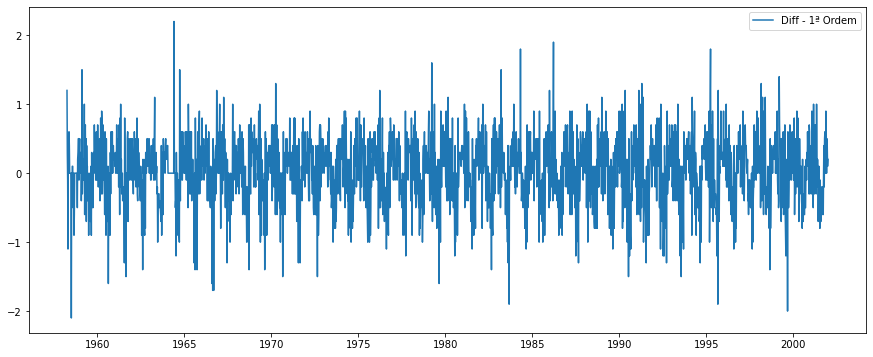

In [40]:
co2_df_1ordem = co2_df.diff()
plt.plot(co2_df_1ordem, label="Diff - 1ª Ordem")
plt.legend(loc='best')
plt.show()

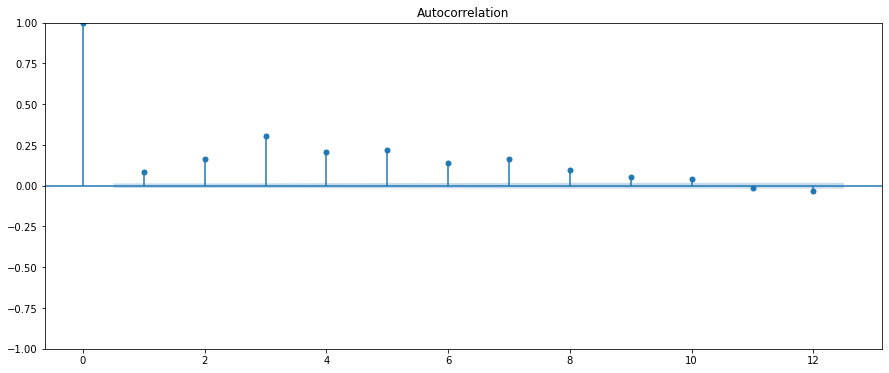

In [42]:
plot_acf(co2_df_1ordem.dropna(), lags=12, alpha=0.5);